# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [5]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
20280,36,Private,47310,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
30408,33,Private,225507,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,<=50K
24296,54,Private,217718,5th-6th,3,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,30,Haiti,<=50K
4031,36,Private,183612,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,40,United-States,>50K
15111,41,Private,154668,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
26585,22,Private,184543,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
31727,50,Private,176157,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19731,34,Federal-gov,345259,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K
19994,33,Private,143851,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
21294,27,Private,47907,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States,<=50K


In [6]:
data.shape
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


 Descriptive statistics

In [7]:
data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Setul de date conține variabile demografice și economice. Statisticile descriptive indică tendința centrală și variabilitatea caracteristicilor numerice. Exista scale diferite pentru variabile precum fnlwgt, capital-gain și hours-per-week.

Target distribution

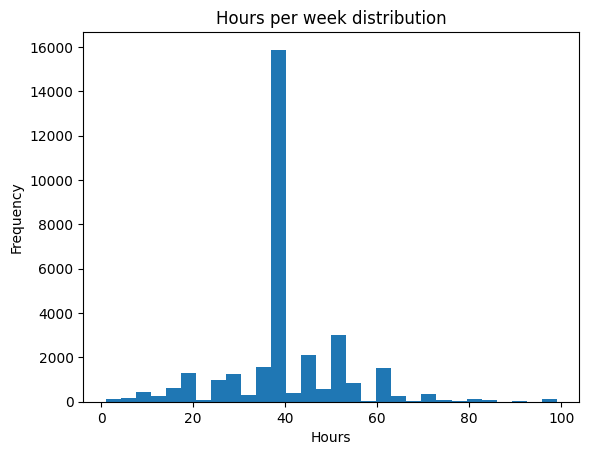

In [21]:
plt.figure()
plt.hist(data["hours-per-week"], bins=30)
plt.title("Hours per week distribution")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()


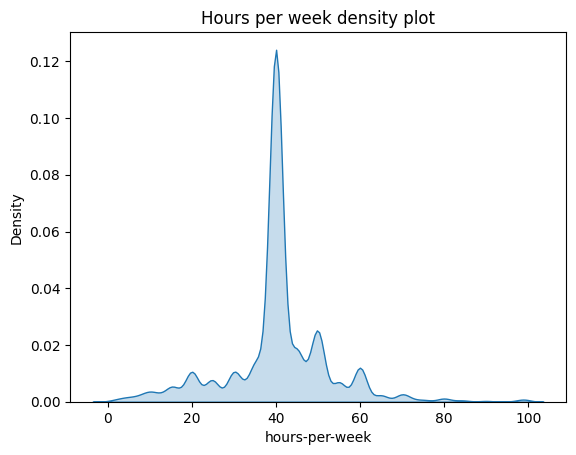

In [10]:
plt.figure()
sns.kdeplot(data["hours-per-week"], fill=True)
plt.title("Hours per week density plot")
plt.show()


Variabila target hours-per-week prezintă un vârf pronunțat în jurul programului de lucru full-time. Distribuția este right-skewed, cu câteva outliers ridicate. Acest lucru poate sugera că majoritatea persoanelor lucrează un număr standard de ore, în timp ce un număr mai mic de persoane lucrează un număr extrem de ore.

Missing values count si procent 

In [11]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent
})

missing_table


,missing_count,missing_percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


Outlier detection with boxplot

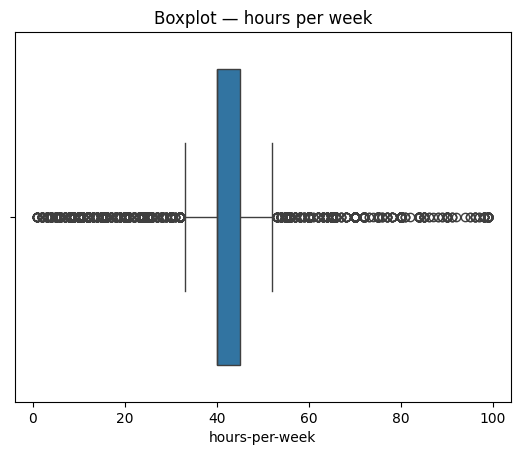

In [13]:
plt.figure()
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot — hours per week")
plt.show()


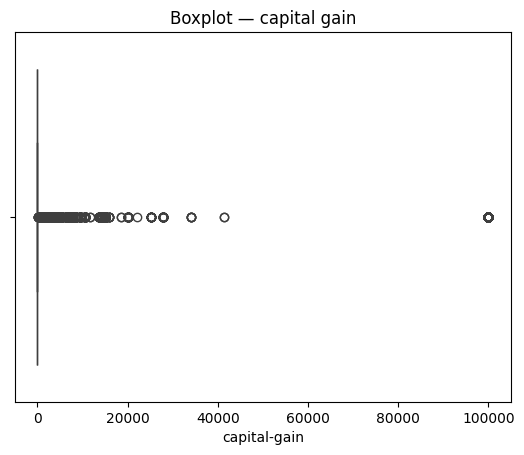

In [14]:
plt.figure()
sns.boxplot(x=data["capital-gain"])
plt.title("Boxplot — capital gain")
plt.show()


Boxplot-urile indică prezența outliers, în special în cazul variabilei capital-gain, care conține multe valori de zero și câteva valori extrem de mari. De asemenea, variabila hours-per-week prezintă durate de lucru extreme.

Histograms for 3 numeric columns

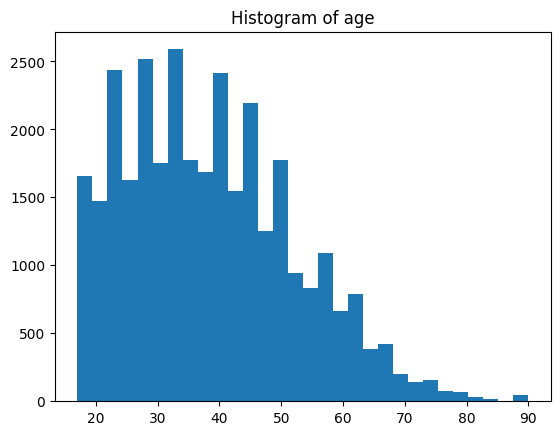

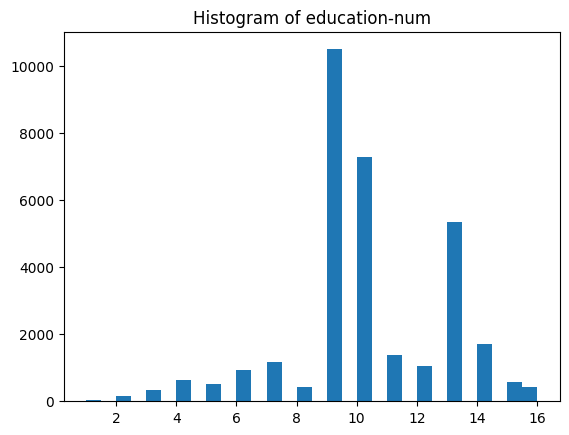

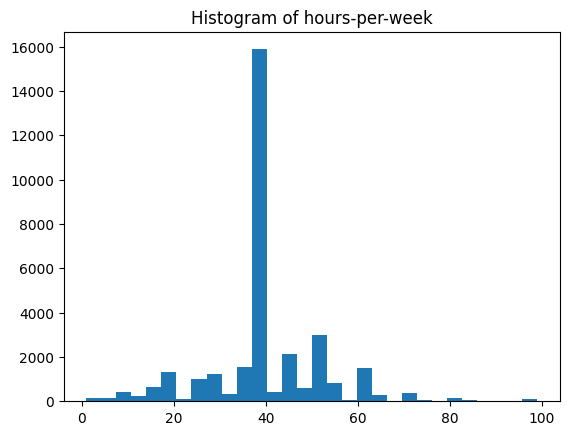

In [15]:
num_cols = ["age", "education-num", "hours-per-week"]

for col in num_cols:
    plt.figure()
    plt.hist(data[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()


Vârsta prezintă o distribuție ușor right-skewed.
Numărul de ani de educație este o variabilă multimodală.
Numărul de ore pe săptămână este puternic concentrat în jurul valorii de 40.

Bar plots for categorical variables

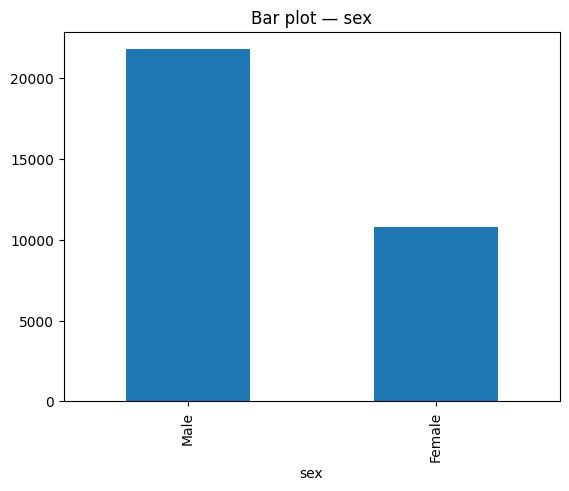

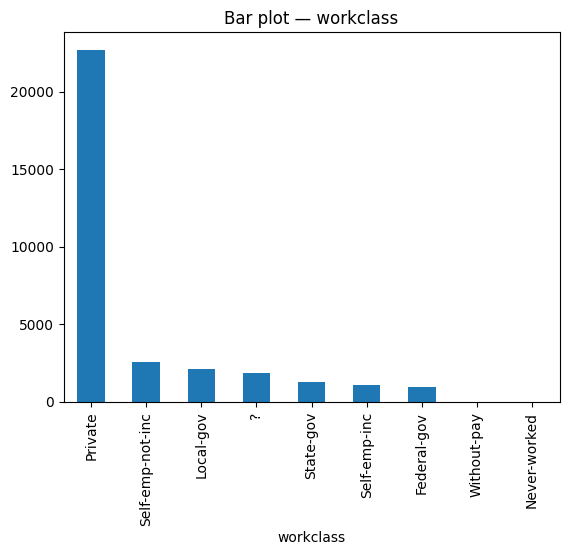

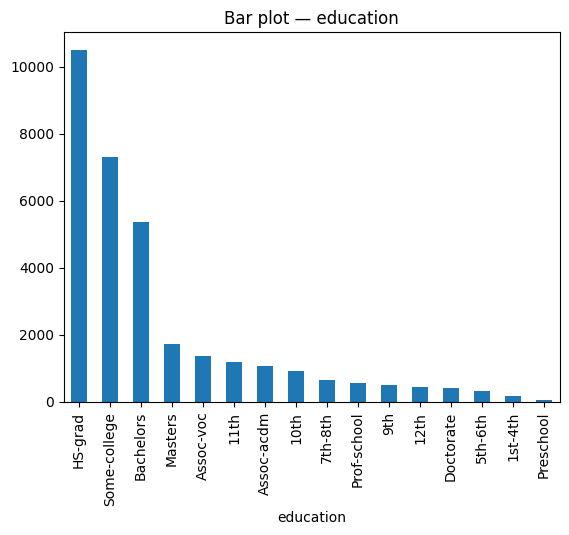

In [16]:
cat_cols = ["sex", "workclass", "education"]

for col in cat_cols:
    plt.figure()
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Bar plot — {col}")
    plt.show()


Correlation matrix with target

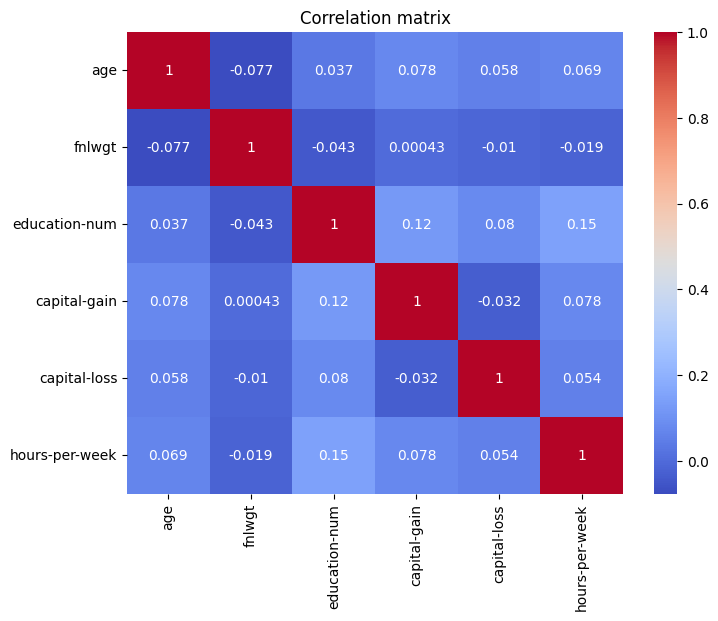

In [17]:
num_data = data.select_dtypes(exclude='object')

corr = num_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


In [18]:
corr["hours-per-week"].sort_values(ascending=False)


hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64

Hours-per-week prezintă o corelație moderată cu education-num și age.
Capital-gain prezintă o corelație slabă, dar o varianță ridicată.
Majoritatea variabilelor sunt slab corelate cu variabila target.

Scatter plot vs target

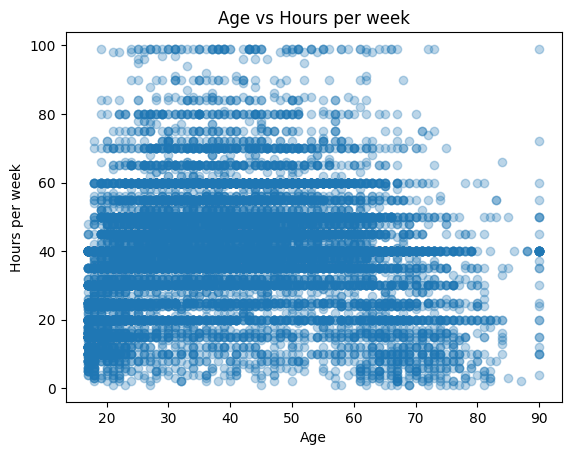

In [19]:
plt.figure()
plt.scatter(data["age"], data["hours-per-week"], alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Hours per week")
plt.title("Age vs Hours per week")
plt.show()


Categorical vs target boxplot

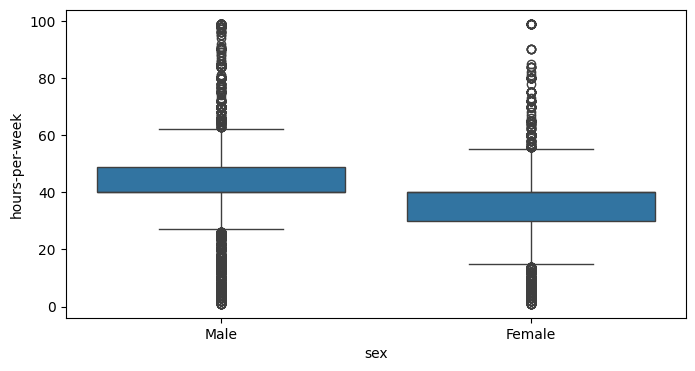

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x="sex", y="hours-per-week", data=data)
plt.show()


Summary report

Variabila target, hours-per-week, este puternic concentrată în jurul valorii de 40 de ore, indicând un regim de lucru standard, full-time. Distribuția este right-skewed, prezentând multiple outliers ridicate.
Analiza outliers indică prezența unor valori extreme în coloana capital-gain și, într-o măsură mai mică, în hours-per-week.
Variabilele numerice, cum ar fi age și education-num, prezintă o corelație moderată cu hours-per-week, în timp ce majoritatea celorlalte caracteristici prezintă o corelație slabă.
Distribuțiile categoriale arata un class imbalance pentru variabilele workclass și education.